1. Implemente o método de detecção de normais apresentado acima.

(1019, 1007)


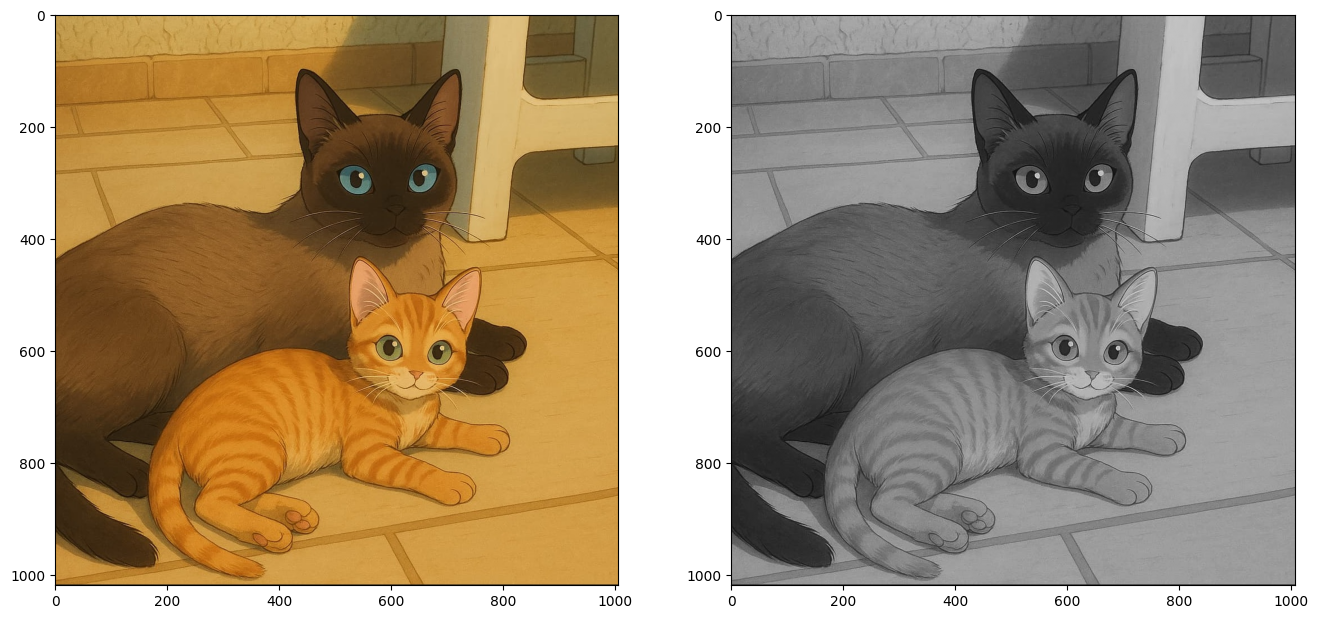

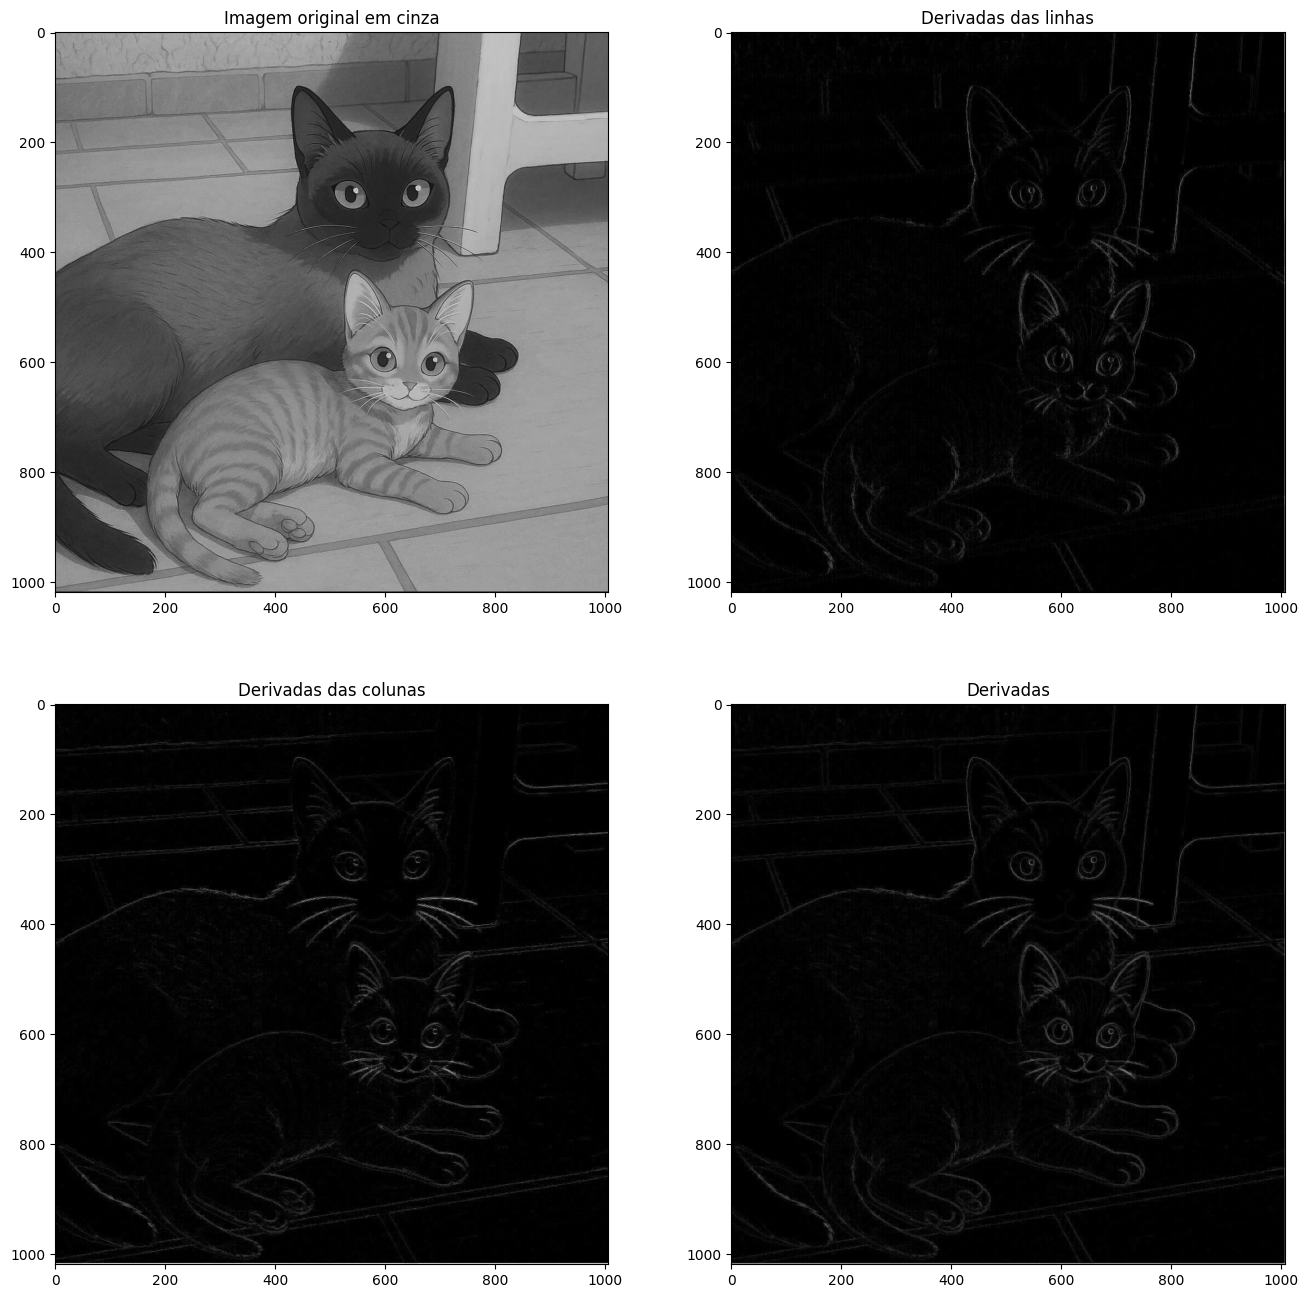

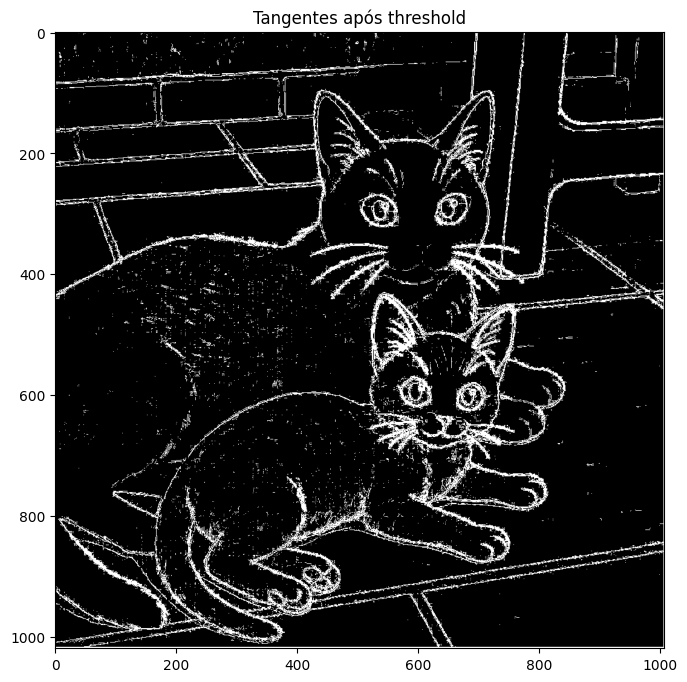

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

gatos_rgb = np.array(Image.open("gatos.jpg"))[:, :, :3]
l, c, p = gatos_rgb.shape

# converter para escala de cinza:
gatos = np.zeros(shape=(l, c), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        r = float(gatos_rgb[i, j, 0])
        g = float(gatos_rgb[i, j, 1])
        b = float(gatos_rgb[i, j, 2])
        
        gatos[i, j] = (r + g + b) / 3

plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.imshow(gatos_rgb)
plt.subplot(1, 2, 2)
plt.imshow(gatos, cmap='gray')

abs_tg_c = np.abs(np.diff(gatos.astype(np.float64), axis=0, append=255))

abs_tg_l = np.abs(np.diff(gatos.astype(np.float64), axis=1, append=255))

abs_tg = np.sqrt(abs_tg_c ** 2 + abs_tg_l ** 2)

threshold = 16

gatos_border = np.zeros(shape=(l, c), dtype=np.uint8)

# Define como branco (255) os pixels onde a variação de intensidade (abs_tg) é maior que o threshold
gatos_border[abs_tg > threshold] = 255

plt.figure(figsize=(16, 16))

plt.subplot(2, 2, 1)
plt.title("Imagem original em cinza")
plt.imshow(gatos, cmap='gray')

plt.subplot(2, 2, 2)
plt.title("Derivadas das linhas")
plt.imshow(abs_tg_l, cmap='gray')

plt.subplot(2, 2, 3)
plt.title("Derivadas das colunas")
plt.imshow(abs_tg_c, cmap='gray')

plt.subplot(2, 2, 4)
plt.title("Derivadas")
plt.imshow(abs_tg, cmap='gray')

plt.figure(figsize=(8, 8))
plt.title("Tangentes após threshold")
plt.imshow(gatos_border, cmap='gray')
print(gatos_border.shape)



2. Escolha algum dos métodos de detecção de borda com convolução acima (exceto Roberts cross) e utilize-o em uma imagem de sua escolha. 

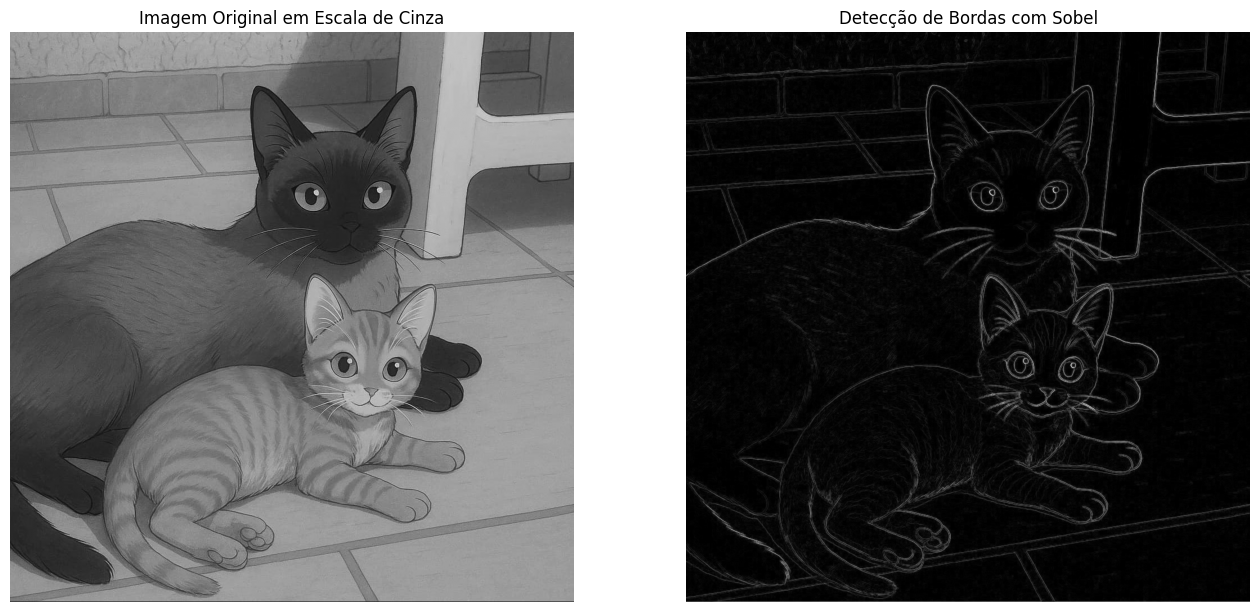

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def conv(image, kernel):
    m, n = kernel.shape
    assert m == n, "Kernel deve ser uma matriz quadrada."
    l, c = image.shape
    
    new_l = l - m + 1
    new_c = c - n + 1
    new_image = np.zeros(shape=(new_l, new_c))
    for i in range(new_l):
        for j in range(new_c):
            new_image[i, j] = np.sum(image[i:i + m, j:j + n] * kernel)
    
    return new_image

def sobel_edge_detection(img):
    # Definindo os kernels de Sobel
    kernel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype=np.float64)
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float64)
    
    # Aplicação dos filtros de Sobel
    grad_x = conv(img, kernel_x)
    grad_y = conv(img, kernel_y)
    
    # Intensidade do gradiente
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    
    # Normalização para [0, 255]
    gradient_magnitude = (gradient_magnitude / np.max(gradient_magnitude)) * 255
    return gradient_magnitude.astype(np.uint8)

# Carregar a imagem e convertê-la para escala de cinza
gatos_rgb = np.array(Image.open("gatos.jpg"))[:, :, :3]
l, c, p = gatos_rgb.shape

gatos = np.zeros(shape=(l, c), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        r = float(gatos_rgb[i, j, 0])
        g = float(gatos_rgb[i, j, 1])
        b = float(gatos_rgb[i, j, 2])
        gatos[i, j] = (r + g + b) / 3

# Aplicar a detecção de bordas
gatos_bordas = sobel_edge_detection(gatos)

# Visualizar os resultados
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title("Imagem Original em Escala de Cinza")
plt.imshow(gatos, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Detecção de Bordas com Sobel")
plt.imshow(gatos_bordas, cmap='gray')
plt.axis('off')

plt.show()